In [2]:
import sys
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import dill

In [3]:
raw_data = pd.read_csv(r'data/new_graph.csv', sep='\t')
raw_data = raw_data.to_numpy()

In [3]:
raw_data

array([[         1,          2,          1, 1095183096],
       [         3,          4,          1, 1095183096],
       [         5,          6,          1, 1095183096],
       ...,
       [        15,         11,      33451, 1115253096],
       [        15,         11,      33451, 1115253096],
       [        15,         11,      33452, 1115253696]], dtype=int64)

### Network visualization

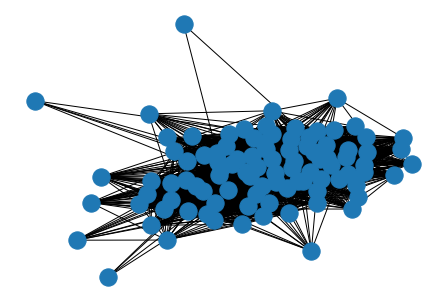

In [4]:
# generate the graph
graph = nx.Graph()

for row in raw_data:
    graph.add_edge(row[0], row[1])
    
nx.draw(graph)
plt.show()

### Network properties

In [5]:
N_nodes = graph.number_of_nodes()
print(f'Nr of nodes: {N_nodes}')

L_edges = graph.number_of_edges()
print(f'Nr of edges: {L_edges}')

p_density = nx.density(graph)
print(f'Link density: {p_density}')

D_mean = (2 * L_edges) / N_nodes
print(f'E[D]: {D_mean}')

D_var = (2 * L_edges * (N_nodes * (N_nodes - 1) - 2 * L_edges)) / (N_nodes * N_nodes * (N_nodes + 1))
print(f'Var[D]: {D_var}')

Nr of nodes: 96
Nr of edges: 2539
Link density: 0.5567982456140351
E[D]: 52.895833333333336
Var[D]: 22.96015446019473


### Degree distribution

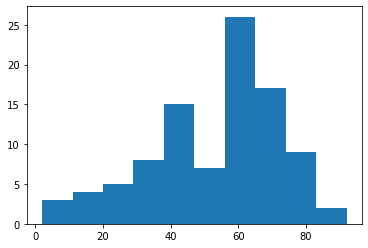

In [6]:
degrees = [num for i,num in graph.degree()]
plt.hist(degrees)
plt.show()

### Infection simulation (utils)

In [7]:
def isolate_nodes(nodes, percent):
    size = int(nodes * percent / 100)
    _list = random.sample(range(nodes), size)
    return dict.fromkeys(_list, True)

def get_delay_timestamp(day):
    return day * 144

### Infection simulation (multiprocessing)

In [8]:
import workers
from multiprocessing import Pool
from timeit import default_timer as timer

In [9]:
if __name__ == '__main__':
    _processes = 10
    _isolated = isolate_nodes(N_nodes, 30)
    _delay = get_delay_timestamp(7)
    _infection_rate = 0.1
    _incubate_delay = get_delay_timestamp(7)
    _recover_delay = get_delay_timestamp(14)
    p = Pool(processes = _processes)
    _start = timer()
    # res = p.starmap(workers.simulate_infection, [(i, raw_data, N_nodes, []) for i in range(1, N_nodes + 1)])
    res = p.starmap(workers.simulate_infection, [(i, raw_data, N_nodes, _isolated, _delay, _infection_rate, _incubate_delay, _recover_delay) for i in range(1, N_nodes + 1)])
    p.close()
    p.join()
    _end = timer()
    print(f'simulation time: {_end-_start}')

simulation time: 67.4542927


In [10]:
infections_list = []
recover_list = []
for result in res:
    infections_list.append(result[0])
    recover_list.append(result[1])
    
infections = np.array(infections_list)
recovered = np.array(recover_list)
infections_mean = np.mean(infections, axis=0)
recovered_mean = np.mean(recovered, axis=0)
infections_var = np.var(infections, axis=0)

In [ ]:
def run_simulation(N_nodes, isolated_param,delay_param,inf_rate_param,incubate_param,recover_param):
    if __name__ == '__main__':
        _processes = 10
        _isolated = isolate_nodes(N_nodes, isolated_param)
        _delay = get_delay_timestamp(delay_param)
        _infection_rate = inf_rate_param
        _incubate_delay = get_delay_timestamp(incubate_param)
        _recover_delay = get_delay_timestamp(recover_param)
        p = Pool(processes = _processes)
        _start = timer()
        # res = p.starmap(workers.simulate_infection, [(i, raw_data, N_nodes, []) for i in range(1, N_nodes + 1)])
        res = p.starmap(workers.simulate_infection, [(i, raw_data, N_nodes, _isolated, _delay, _infection_rate, _incubate_delay, _recover_delay) for i in range(1, N_nodes + 1)])
        p.close()
        p.join()
        _end = timer()
        print(f'simulation time: {_end-_start}')
        return res
    else:
        return None
    
def create_plot(res):
    infections_list = []
    for result in res:
        infections_list.append(result[0])
    infections = np.array(infections_list)
    infections_mean = np.mean(infections, axis=0)
    infections_var = np.var(infections, axis=0)
    return infections_mean


In [ ]:
import random

isolated_params = [80,90,100] # 3
delay_params = [1,3,5,7] # 4
infection_rate_params = [0.01,0.05,0.1,0.5,1] # 5
incubate_params = [1,3,5,7] # 4
recover_params = [10,12,14,16] # 4

all_vals = list(itertools.product(isolated_params,delay_params,infection_rate_params,incubate_params,recover_params))
random.shuffle(all_vals) # not necessary

vals_len = 3 * 4 * 5 * 4 * 4
for index, value in enumerate(all_vals):
    print("running simulation {} out of {}".format(index+1,vals_len))
    res = run_simulation(N_nodes,value[0],value[1],value[2],value[3],value[4])
    inf_mean = create_plot(res)
    plt.plot(inf_mean)
    plt.savefig("plots/{}-{}-{}-{}-{}.png".format(value[0],value[1],value[2],value[3],value[4]))
    plt.clf()

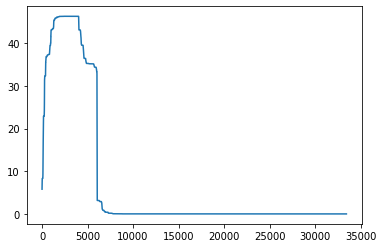

In [11]:
plt.plot(infections_mean)

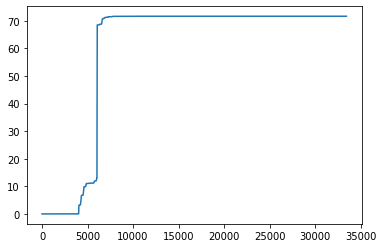

In [12]:
plt.plot(recovered_mean)